In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://erdb.epa.gov.tw/DataRepository/EnvMonitor/WeatherData.aspx?topic1=%u5927%u6c23&topic2=%u74b0%u5883%u53ca%u751f%u614b%u76e3%u6e2c&subject=%u5929%u6c23"

In [3]:
df = pd.read_html(url)

In [39]:
data = df[5].copy()

In [40]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,525,526,527,528,529,530,531,532,533,534
0,.count { color: #000; /*background-color: #...,12345678910...,1,2,3,4,5,6,7,8,...,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...
1,12345678910...,1,2,3,4,5,6,7,8,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,3,4,5,6,7,8,9,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,測站,監測日期,監測時間,測站氣壓(hPa),溫度(℃),相對溼度(%),風向,風速(m/s),降水量(mm),日照時數(小時),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,嘉義,2019/03/13,23:03:00,1016.20,19.40,85,東北東,1.10,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
data = data[3:]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,525,526,527,528,529,530,531,532,533,534
3,測站,監測日期,監測時間,測站氣壓(hPa),溫度(℃),相對溼度(%),風向,風速(m/s),降水量(mm),日照時數(小時),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,嘉義,2019/03/13,23:03:00,1016.20,19.40,85,東北東,1.10,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,嘉義,2019/03/13,22:03:00,1015.90,19.90,83,靜風,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,嘉義,2019/03/13,21:03:00,1015.60,20.90,78,靜風,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,嘉義,2019/03/13,20:03:00,1015.30,21.50,75,靜風,0.20,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
colname = data.loc[3].values
data.columns=colname

In [44]:
data = data[1:]

In [45]:
data.head()

,測站,監測日期,監測時間,測站氣壓(hPa),溫度(℃),相對溼度(%),風向,風速(m/s),降水量(mm),日照時數(小時),...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,嘉義,2019/03/13,23:03:00,1016.20,19.40,85,東北東,1.10,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,嘉義,2019/03/13,22:03:00,1015.90,19.90,83,靜風,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,嘉義,2019/03/13,21:03:00,1015.60,20.90,78,靜風,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,嘉義,2019/03/13,20:03:00,1015.30,21.50,75,靜風,0.20,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,嘉義,2019/03/13,19:03:00,1014.70,22,73,靜風,0.10,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data.drop(data[data.測站 != "嘉義"].index, inplace=True)

In [60]:
x=data["測站氣壓(hPa)"].values
y=data["溫度(℃)"].values
print (x.shape)
print (y.shape)

(24,)
(24,)


In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [63]:
X = x.reshape(-1, 1)
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
test = np.linspace(1010, 1023, 50)
test = test.reshape(-1, 1)
print (test.shape)

(50, 1)


In [65]:
Y = reg.predict(X)

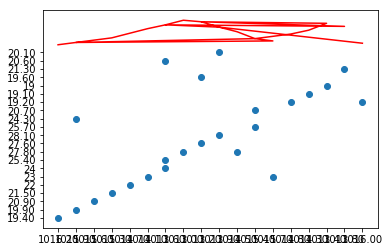

In [66]:
plt.scatter(x, y)
plt.plot(x, Y, "r")
